In [42]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('teleCust1000t.csv')

In [44]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


<Axes: >

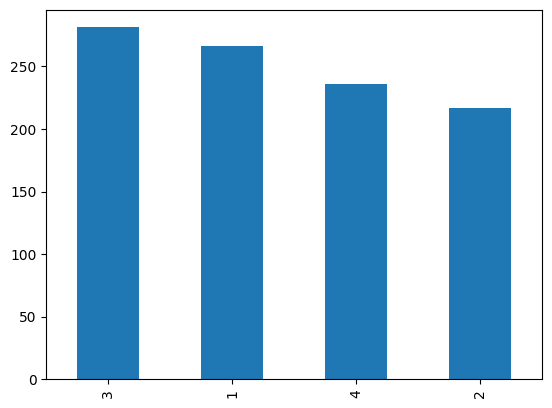

In [46]:
df['custcat'].value_counts().plot.bar()

C:\Users\METROPOLITAN\AppData\Local\Temp\ipykernel_17480\2973180322.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df ['income'], hist = False)
C:\Users\METROPOLITAN\AppData\Local\Temp\ipykernel_17480\2973180322.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df ['te

<Axes: xlabel='address', ylabel='Density'>

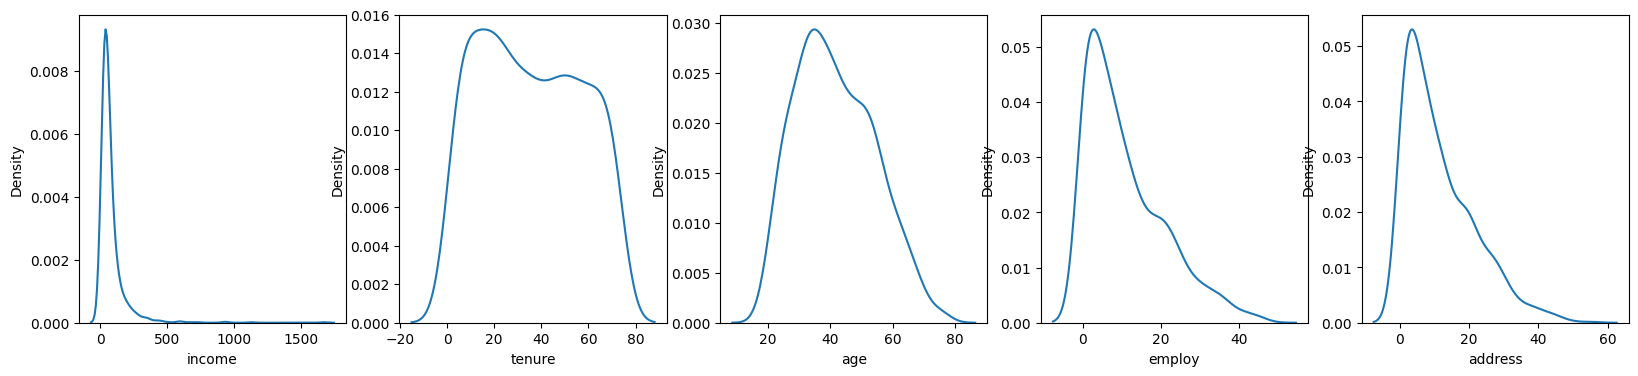

In [55]:
plt.figure (figsize = (20,4))
plt.subplot (1,5,1)
sns.distplot (df ['income'], hist = False)

plt.subplot (1,5,2)
sns.distplot (df ['tenure'], hist = False)

plt.subplot (1,5,3)
sns.distplot (df ['age'], hist = False)

plt.subplot (1,5,4)
sns.distplot (df ['employ'], hist = False)

plt.subplot (1,5,5)
sns.distplot (df ['address'], hist = False)

# plt.tight_layout ()

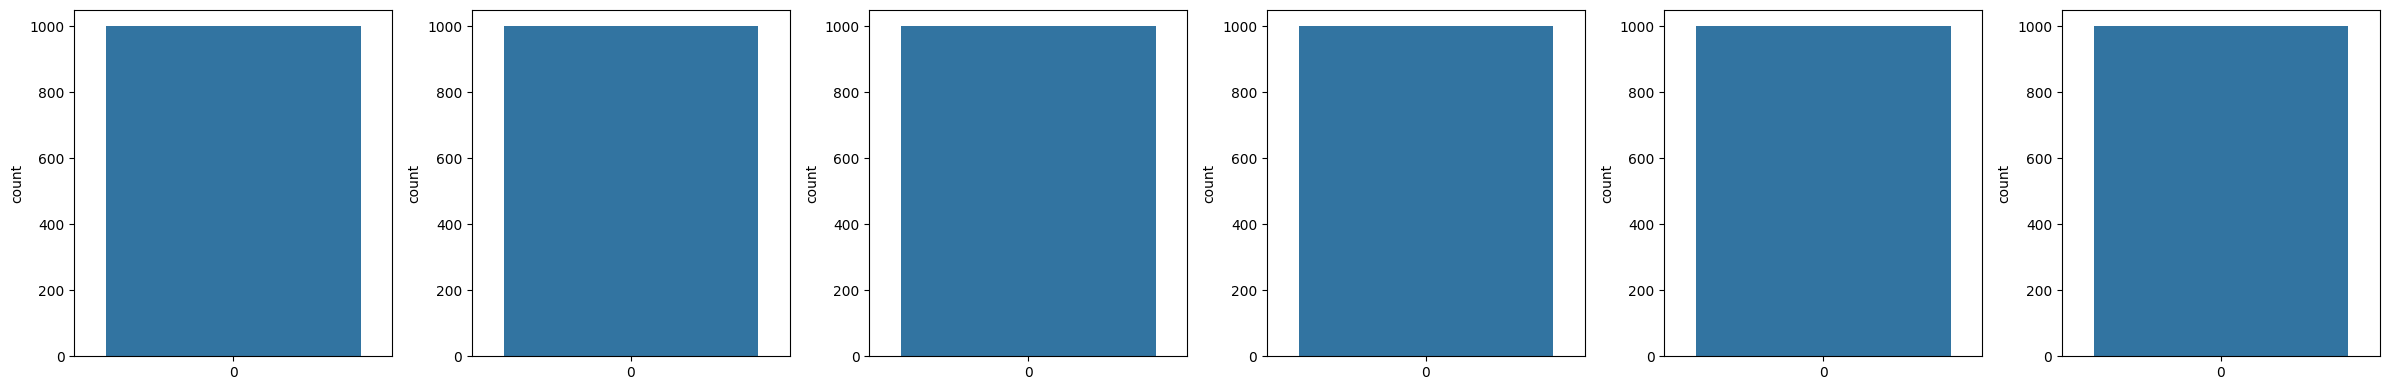

In [57]:
plt.figure (figsize = (24,4))

plt.subplot (1,6,1)
sns.countplot (df ['ed'])

plt.subplot (1,6,2)
sns.countplot (df ['region'])

plt.subplot (1,6,3)
sns.countplot (df ['retire'])

plt.subplot (1,6,4)
sns.countplot (df ['reside'])

plt.subplot (1,6,5)
sns.countplot (df ['marital'])

plt.subplot (1,6,6)
sns.countplot (df ['gender'])

plt.tight_layout ()

In [58]:
X = df.drop (['custcat'], axis = 1)
y = df ['custcat']

array([[<Axes: title={'center': 'income'}>]], dtype=object)

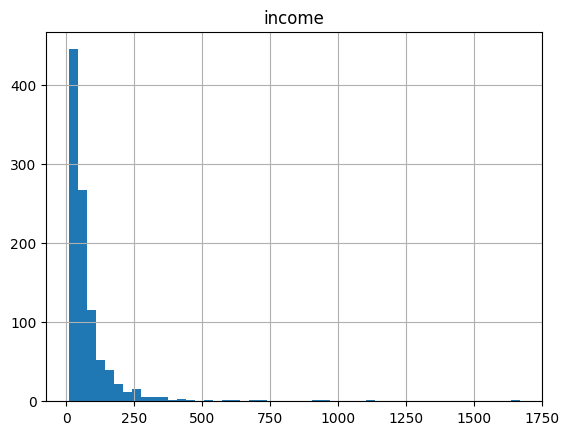

In [59]:
df.hist (column = 'income', bins = 50)

## Normalize Data

In [60]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [61]:
X[0:1]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004]])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Defineand train KNN model

In [64]:
k = 4
#Train Model and Predict
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### Get predictions

In [65]:
pred_y = model.predict(X_test)

In [67]:
print("Accurecy of model at k = {} is {}".format(k,metrics.accuracy_score(y_test, pred_y)))

Accurecy of model at k = 4 is 0.32


In [68]:
pred_y

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3], dtype=int64)

Text(0, 0.5, 'Error Rate')

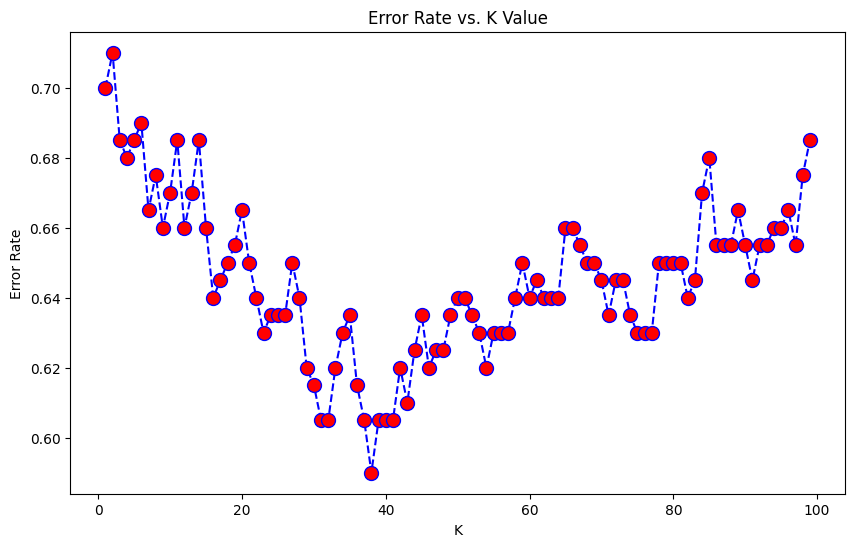

In [79]:
ks = 100
error_rate = []
# Will check for k values from 1 to 40
for i in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,ks),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [81]:
print("Minimum error rate is {} at k = {}".format(min(error_rate),error_rate.index(min(error_rate))))

Minimum error rate is 0.59 at k = 37


Maximum accuracy is 0.41 at k = 37


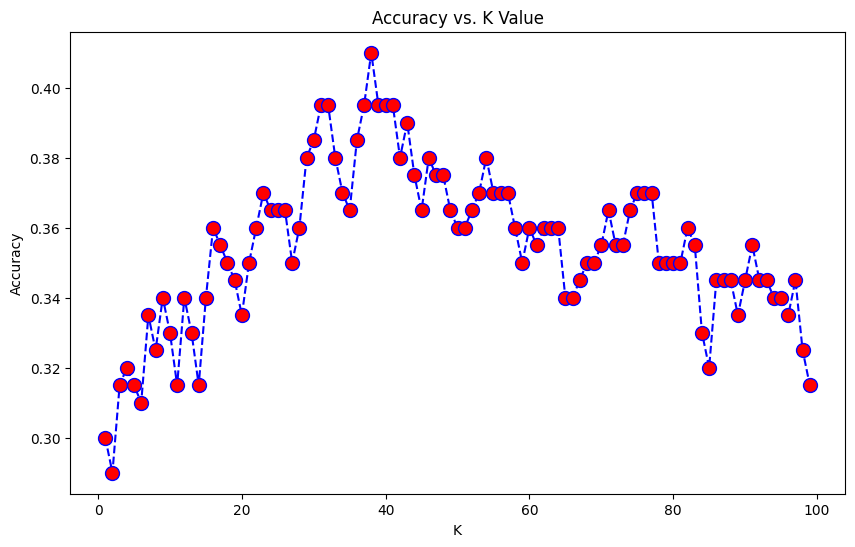

In [82]:
accuracy = []

# Check accuracy for k values from 1 to 40
for i in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,ks),accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy is {} at k = {}".format(max(accuracy),accuracy.index(max(accuracy))))